In [1]:
import json

f = open('metal_pbe_d3.json',)
   
data = json.load(f)

In [2]:
ids = data['optimized_id']
formulas = data['formula']
nxyz = data['nxyz']
original = data['original']
energy = data['energy']

print(original)
print(energy)

{'0': '../../Cu_Au_ce_structures/structure_num_69.cif', '1': '../../Cu_Au_ce_structures/structure_num_Au3_Cu_GS_4.cif', '2': '../../Cu_Au_ce_structures/structure_num_Au_GS_4.cif', '3': '../../Cu_Au_ce_structures/structure_num_Au_Cu_GS_4.cif', '4': '../../Cu_Au_ce_structures/structure_num_Cu_GS_4.cif', '5': '../../Cu_Au_ce_structures/structure_num_Cu3_Au_GS_4.cif'}
{'0': -16.0042520373, '1': -15.9567457131, '2': -15.4290834074, '3': -16.567138466, '4': -17.3378225128, '5': -16.981820792}


In [3]:
ids_lst = ids.keys()

In [4]:
concs = []
energies = []
sizes = []
names = []
nxyz_l = []

for idx in ids_lst:
    
    curr_latt = nxyz[idx]
    au_conc = 0
    for i in range(len(curr_latt)):
        if curr_latt[i][0] == 79:
            au_conc+=1
    
    concs.append(float(au_conc)/len(curr_latt))
    
    sizes.append(len(curr_latt))
    
    energies.append(energy[idx]/len(curr_latt))
    
    names.append(original[idx])
    
    nxyz_l.append(curr_latt)

In [5]:
au_energy = None
cu_energy = None
for i in range(len(concs)):
    if concs[i]==1.0:
        au_energy = energies[i]
    if concs[i]==0.0:
        cu_energy = energies[i]

In [6]:
form_energies = []
for i in range(len(energies)):
    f_energy = energies[i] - (1-concs[i])*cu_energy - (concs[i])*au_energy
    form_energies.append(f_energy)

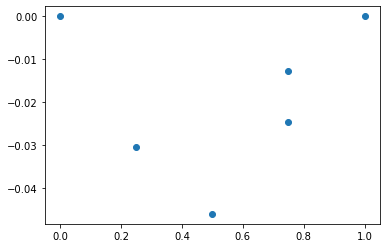

In [7]:
import matplotlib.pyplot as plt
plt.scatter(concs,form_energies)

In [8]:
print(concs)
print(energies)

[0.75, 0.75, 1.0, 0.5, 0.0, 0.25]
[-4.001063009325, -3.989186428275, -3.85727085185, -4.1417846165, -4.3344556282, -4.245455198]


In [9]:
from ase import Atoms
from ase.calculators.emt import EMT
from ase.db import connect
import clease

from clease.tools import update_db
from clease import Concentration
from clease import CEBulk
from clease import Evaluate
from clease import NewStructures
from clease.calculator import Clease
from clease.calculator import attach_calculator
from ase.eos import EquationOfState
import sys
from ase.constraints import ExpCellFilter
from ase.optimize import BFGS

import pickle 
from ase.io.trajectory import TrajectoryWriter
from ase.io import read
from ase.io import iread

In [10]:
data_dict = {
    98864349: '00',
    105293713: '01',
    105320663 : '02',
    108601703 : '03',
    99046316: '04',
    110606251 : '05',
    99161827 : '06',
    110964065 : '07',
    105407871 : '08',
    99046390 : '09',
    108930040 : '10',
    98949494 : '11',
    99595542 : '12',
    105482576 : '13',
    110667022 : '14',
    99330498 : '15',
    99473709 : '16',
    99329521 : '17',
    98984969 : '18',
    109929126 : '19',
    108808332: '20',
    108601491: '21',
    99161952 : '22',
    109476654 : '23',
    99046384 : '24',
    99329786 : '25',
    99329474 : '26',
    105348874 : '27',
    99161696 : '28',
    108892439 : '29',
    110667147 : '30',
    110812143 : '31',
    105480880 : '32',
    99329724 : '33',
    110863183 : '34',
    108492017 : '35',
    105307263 : '36',
    99329562: '37',
    105314401: '38',
    110606250 : '39',
    108321355 : '40',
    108491940: '41',
    99329951: '42',
    99329700: '43',
    110729666: '44',
    99162016: '45',
    99329699 : '46',
    99329672: '47',
    99543151 : '48',
    99161461 : '49',
    99415514 : '50',
    99330334 : '51',
    105499686: '52',
    100024906: '53',
    99673164 : '54',
    112061501 : '55',
    99473796 : '56',
    99753656 : '57',
    105510331 : '58',
    99330077 : '59',
    99885754 : '60',
    99473750 : '61',
    105314402: '62',
    105435216: '63',
    99672949 : '64',
    99595401 : '65',
    99415433 : '66',
    105480881  : '67', 
}

In [11]:
with open('james_AuCu.pkl', 'rb') as f:
    data = pickle.load(f)
    
data_sorted = sorted(data, key=lambda k: data_dict[k['geom_id']])

In [12]:
stored_energies = []
stored_conc = []
size = []
i = 0
for i in range(68):

    atoms_init = 'Cu_Au_ce_structures/structure_num_'
    if i <10:
        atoms_init = atoms_init + '0'
    atoms_init = atoms_init + str(i)
    atoms_init = atoms_init + '.cif'
    
    atoms = read(atoms_init)
    #print(atoms)
    atoms_temp = atoms.copy()
    curr = data_sorted[i]
    curr_energy = data_sorted[i]['energy']*27.2
    curr_nxyz = data_sorted[i]['nxyz']
    #print(curr_energy)
    
    for j in range(len(curr_nxyz[0])):
        atoms_temp.numbers[j] = curr_nxyz[0][j][0]
        atoms_temp.positions[j] = curr_nxyz[0][j][1:]
        
    stored_energies.append(curr_energy/len(atoms_temp.numbers))
    count = 0
    for j in range(len(atoms_temp.numbers)):
        if (atoms_temp.numbers[j] == 79):
            count = count + 1
    
    stored_conc.append(count/len(atoms_temp.numbers))
    size.append(len(atoms_temp.numbers))
    atoms_dft = 'Metals_Group_Traj_Files/structure_num_'
    if i <10:
        atoms_dft = atoms_dft + '0'
    atoms_dft = atoms_dft + str(i)
    atoms_dft = atoms_dft + '.traj'
    
    temp_writer = TrajectoryWriter(atoms_dft,mode = 'w')
    temp_writer.write(atoms_temp,energy = curr_energy)
    
    i = i + 1

In [13]:
print(stored_conc)
print(len(stored_conc))

[1.0, 0.0, 0.9444444444444444, 0.125, 0.4166666666666667, 0.25, 0.625, 0.75, 0.75, 0.16666666666666666, 0.3125, 0.25, 0.4375, 0.75, 0.75, 0.5, 0.25, 0.3125, 0.25, 0.5625, 0.625, 0.125, 0.3333333333333333, 0.5, 0.16666666666666666, 0.8125, 0.5833333333333334, 0.6666666666666666, 0.375, 0.125, 0.75, 0.8, 0.7777777777777778, 0.375, 0.5625, 0.3333333333333333, 0.75, 0.4666666666666667, 0.8333333333333334, 0.6666666666666666, 0.5, 0.25, 0.6666666666666666, 0.5, 0.75, 0.3333333333333333, 0.3888888888888889, 0.5833333333333334, 0.5555555555555556, 0.5, 0.4444444444444444, 0.5, 0.34375, 0.53125, 0.140625, 0.921875, 0.125, 0.09375, 0.859375, 0.1875, 0.625, 0.6875, 0.75, 0.890625, 0.4375, 0.046875, 0.109375, 0.953125]
68


In [14]:
form_energies = []

for i in range(len(stored_energies)):
    ind = len(stored_energies)-1-i
    form_energies.append(0)

for i in range(len(stored_energies)):
    ind = len(stored_energies)-1-i
    form_energies[ind] = stored_energies[ind] - stored_conc[ind]*stored_energies[0]-(1-stored_conc[ind])*stored_energies[1]

In [15]:

i = 0
for i in range(68):

    atoms_init = 'Cu_Au_ce_structures/structure_num_'
    if i <10:
        atoms_init = atoms_init + '0'
    atoms_init = atoms_init + str(i)
    atoms_init = atoms_init + '.cif'
    
    atoms = read(atoms_init)
    #print(atoms)
    atoms_temp = atoms.copy()
    curr = data_sorted[i]
    curr_energy = data_sorted[i]['energy']*27.2
    curr_nxyz = data_sorted[i]['nxyz']
    
    atoms_dft = 'Metals_Group_Traj_Files_Form/structure_num_'
    if i <10:
        atoms_dft = atoms_dft + '0'
    atoms_dft = atoms_dft + str(i)
    atoms_dft = atoms_dft + '.traj'
    
    temp_writer = TrajectoryWriter(atoms_dft,mode = 'w')
    temp_writer.write(atoms_temp,energy = form_energies[i]*len(atoms_temp.numbers))
    print(form_energies[i]*len(atoms_temp.numbers))
    i = i + 1

0.0
0.0
-0.12105973917558516
0.1237962425966117
-0.2302460757375826
-0.022057605491990984
0.7422435992623662
-0.057302575555162605
0.09921460216054179
-0.07126957346451768
0.3267715471282173
-0.12826223637127754
-0.1695396663689337
-0.009254172555692719
-0.031180468065794997
0.03220350192056998
0.0043165288995759
0.24486640490495404
0.10557862567181786
0.26799408454213136
0.03807219047431332
0.1917636746391267
0.15185718272642124
0.5873728542009786
0.13220148584872948
0.04316924483827478
-0.25647616048511157
-0.096698039085791
0.012573459293911071
0.6960092112012148
-0.02026580374646514
-0.035573349973903046
-0.07265328869591592
0.0293712186307431
0.3165390444871221
0.20915144676405317
0.09267633665564112
-0.12436061862634018
-0.041802939812122464
0.031275778131433674
0.28028644411518044
0.03771506010985348
0.20402138123156677
0.32092863777315017
-0.11204106044935003
0.007045607931386755
0.26594772195612215
0.1489973284886501
0.42184695858552956
-0.17287816005955392
0.21503100826210364

In [16]:
db_name = "aucu_temp.db"
db = connect(db_name)

i = 0
for row in db.select(converged=True):
    atoms_init = row.toatoms()
    if stored_conc[i]==0.0:
        print(atoms_init)
        print(stored_energies[i])
    i+=1

Atoms(symbols='Cu4', pbc=True, cell=[[1.9, 3.8, 5.699999999999999], [3.8, 0.0, 3.8], [1.9, 1.9, 0.0]], tags=...)
-4.343651227977503


In [17]:
db_name = "aucu_temp.db"
db = connect(db_name)

i = 0
for row in db.select(converged=True):
    atoms_init = row.toatoms()
    if stored_conc[i]==1.0:
        print(atoms_init)
        print(stored_energies[i])
    i+=1

Atoms(symbols='Au4', pbc=True, cell=[[1.9, 3.8, 5.699999999999999], [3.8, 0.0, 3.8], [1.9, 1.9, 0.0]], tags=...)
-3.866187894828443


In [18]:
db_name = "aucu_temp.db"
db = connect(db_name)
atoms_50 =[]
i = 0
for row in db.select(converged=True):
    atoms_init = row.toatoms()
    if stored_conc[i]==0.5:
        atoms_50.append(atoms_init)
        print(stored_energies[i])
    i+=1

-4.102235936242925
-4.068208758015412
-4.058205154050443
-4.07817550825521
-4.148139101417861
-4.098775396022421


In [19]:
print(atoms_50[4])
print(atoms_50[4].numbers)
print(atoms_50[4].positions)

Atoms(symbols='Cu2Au2', pbc=True, cell=[[0.0, 3.8, 3.8], [3.8, 1.9, 1.9], [3.8, 3.8, 0.0]], tags=...)
[29 29 79 79]
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.3337977e-31  1.9000000e+00  1.9000000e+00]
 [ 1.9000000e+00  1.9000000e+00 -1.1102213e-17]
 [ 1.9000000e+00  3.8000000e+00  1.9000000e+00]]


In [20]:
from ase.visualize import view
#view(atoms_50[4], viewer='x3d')

In [21]:
db_name = "aucu_temp.db"
db = connect(db_name)

i = 0
atoms_25 = []
for row in db.select(converged=True):
    atoms_init = row.toatoms()
    if stored_conc[i]==0.25:
        atoms_25.append(atoms_init)
        print(stored_energies[i])
    i+=1

-4.229799796063236
-4.256350953783057
-4.223925683948607
-4.197890738272283
-4.2148566296627745


In [22]:
print(atoms_25[4])
print(atoms_25[4].numbers)
print(atoms_25[4].positions)

Atoms(symbols='Cu3Au', pbc=True, cell=[[5.699999999999999, 5.699999999999999, 7.6], [1.9, 0.0, 1.9], [3.8, 3.8, 0.0]], tags=...)
[29 29 29 79]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.90000000e+00 1.90000000e+00 5.02925812e-23]
 [3.80000000e+00 3.80000000e+00 3.80000000e+00]
 [5.70000000e+00 5.70000000e+00 3.80000000e+00]]


In [72]:
#view(atoms_25[4], viewer='x3d')

In [23]:
db_name = "aucu_temp.db"
db = connect(db_name)

i = 0
atoms_75 = []
for row in db.select(converged=True):
    atoms_init = row.toatoms()
    if stored_conc[i]==0.75:
        atoms_75.append(atoms_init)
        print(stored_energies[i])
        print(len(atoms_init.numbers))
    i+=1

-3.9927165500601034
8
-3.9772858446023296
12
-3.986132113900439
16
-3.993348845132157
4
-3.988086953584016
8
-3.962384643951798
4
-3.999558860671877
8
-3.9572308666356752
64


In [24]:
print(atoms_75[6])
print(atoms_75[6].numbers)
print(atoms_75[6].positions)

Atoms(symbols='Au2Cu2Au4', pbc=True, cell=[[3.8, 5.699999999999999, 5.699999999999999], [3.8, 1.9, 1.9], [7.6, 7.6, 0.0]], tags=...)
[79 79 29 29 79 79 79 79]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.90000000e+00  1.90000000e+00  0.00000000e+00]
 [ 3.80000000e+00  3.80000000e+00 -2.22044512e-17]
 [ 3.80000000e+00  3.80000000e+00  3.80000000e+00]
 [ 5.70000000e+00  5.70000000e+00  3.99680273e-16]
 [ 5.70000000e+00  5.70000000e+00  3.80000000e+00]
 [ 7.60000000e+00  7.60000000e+00  3.80000000e+00]
 [ 9.50000000e+00  9.50000000e+00  3.80000000e+00]]


In [90]:
#view(atoms_75[6]*(2,2,2), viewer='x3d')

In [25]:
db_name = "aucu_temp.db"
db = connect(db_name)
import copy
conc = Concentration(basis_elements=[['Au', 'Cu']])
settings = CEBulk(crystalstructure='fcc',
                   a=3.8,
                   supercell_factor=64,
                   concentration=conc,
                   db_name="aucu_metals_Final_Submission.db",
                   max_cluster_size=4,
                   max_cluster_dia=[6.0, 4.5,4.5])

i=0
count = 0
for row in db.select(converged=True):
    ns = NewStructures(settings, generation_number=i, struct_per_gen=1)
    
    ##### get relevant cif file
    atoms_init = row.toatoms()
    
    #### get relevant traj file
    atoms_dft = 'Metals_Group_Traj_Files_Form/structure_num_'
    if i <10:
        atoms_dft = atoms_dft + '0'
    atoms_dft = atoms_dft + str(i)
    atoms_dft = atoms_dft + '.traj'
    atoms_dft = read(atoms_dft)
    
    
    if form_energies[i] < 0.02 and len(atoms_init.numbers) < 64:
        count += 1
        print(len(atoms_init.numbers))
        ns.insert_structure(init_struct = atoms_init, final_struct = atoms_dft)
    
    i+=1

/home/james/miniconda3/envs/james_mlmat/lib/python3.7/site-packages/ase/io/jsonio.py:122: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  a = np.array(obj)


4
4
18
8
12
4
8
12
12
4
16
16
4
12
12
16
16
8
18
16
12
6
8
8
10
18
16
16
15
12
3
4
18
8
12
18
12
4
18
10


In [26]:
import copy
new_atoms = copy.deepcopy(atoms_25[1])

In [27]:
new_atoms.numbers = [79,29,79,79]

In [28]:
new_energy = -4.00106 - (-4.3436512279*0.25 + -3.8661878948284*0.75)
print(new_energy)

-0.015506271903699798


In [29]:
atoms_dft = 'Metals_Group_Traj_Files_Form/structure_num_Au3_Cu'

atoms_dft = atoms_dft + '.traj'
    
temp_writer = TrajectoryWriter(atoms_dft,mode = 'w')
temp_writer.write(new_atoms,energy = new_energy*4.0)

In [30]:
atoms_dft = read(atoms_dft)

In [31]:
ns = NewStructures(settings, generation_number=70, struct_per_gen=1)
ns.insert_structure(init_struct = new_atoms, final_struct = atoms_dft)

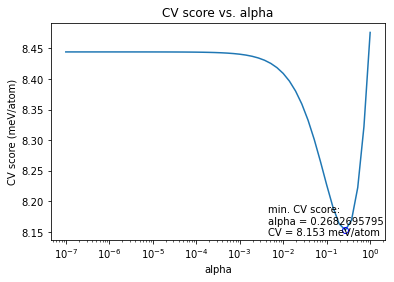

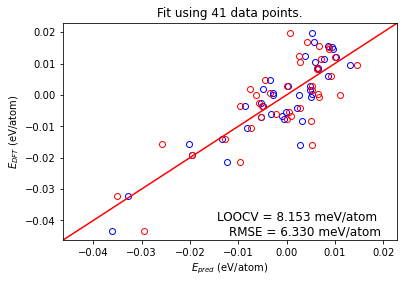

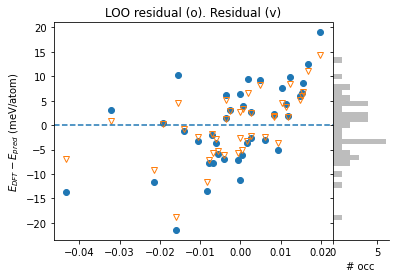

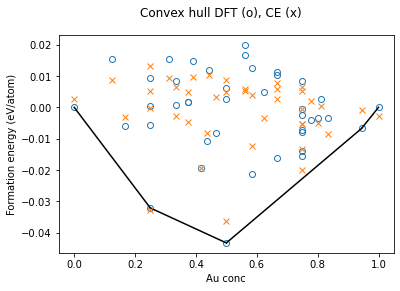

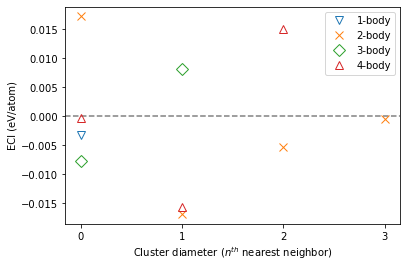

In [44]:
eva = Evaluate(settings, scoring_scheme='loocv', nsplits=10)
eva.set_fitting_scheme(fitting_scheme='l2')
alpha = eva.plot_CV(alpha_min=1E-7, alpha_max=1.0, num_alpha=50)
eva.set_fitting_scheme(fitting_scheme='l2', alpha=alpha)
eva.plot_fit(interactive=False)
eva.plot_ECI()

In [45]:
eva.save_eci(fname='ECI_CuAu_Final_Submission')

In [46]:
import json
with open('ECI_CuAu_Final_Submission.json') as json_file: 
    eci = json.load(json_file)

In [47]:
conc = Concentration(basis_elements=[['Au', 'Cu']])
settings = CEBulk(crystalstructure='fcc',
                   a=3.8,
                   size=[2,2,4],
                   concentration=conc,
                   db_name="aucu_metals_Final_Submission.db",
                   max_cluster_size=4,
                   max_cluster_dia=[6.0, 4.5,4.5])

atoms = settings.atoms.copy()
atoms = attach_calculator(settings, atoms=atoms, eci=eci)

In [48]:
def bin_array(num, m):
    """Convert a positive integer num into an m-bit bit vector"""
    return np.array(list(np.binary_repr(num).zfill(m))).astype(np.int8)

In [49]:
concs = []
energies = []
import numpy as np
# atoms.numbers = ((new_lattice*25)+54).int().cpu().detach().numpy()
structure = np.zeros((16))
min_75 = 99999999
atoms_75 = atoms
import copy

for i in range(16):
    structure[i] = 1
atoms.numbers = ((structure*25)+54)
gold_energy = atoms.get_potential_energy()
for i in range(16):
    structure[i] = -1
atoms.numbers = ((structure*25)+54)
copper_energy = atoms.get_potential_energy()
degen = np.zeros((5))
other_energies = {}
energies_25 = []
energies_50 = []
energies_75 = []

for i in range(2**16):
    ### get bit +1/-1
    structure = bin_array(i,16)
    structure = (structure *2) - 1
    if i % 10000 == 0:
        print('iter')
    atoms.numbers = ((structure*25)+54)
    energy_t = atoms.get_potential_energy()
    conc = np.sum((structure + 1)/2)/16
    energy_hull = energy_t - (conc*gold_energy + (1-conc)*copper_energy)
    
    energy_hull = energy_hull/16
    if conc == 0.0:
        if conc in other_energies:
            
            if abs(energy_hull - other_energies[conc]) < 0.001:
                degen[0]+=1
            elif energy_hull < other_energies[conc]:
                other_energies[conc] = energy_hull
                degen[0] = 1
            
        else:
            other_energies[conc] = energy_hull
            degen[0] = 1
    elif conc == 0.25:
        energies_25.append(energy_hull)
        if conc in other_energies:
            if abs(energy_hull - other_energies[conc]) < 0.001:
                degen[1]+=1
            elif energy_hull < other_energies[conc]:
                other_energies[conc] = energy_hull
                degen[1] = 1
        else:
            other_energies[conc] = energy_hull
            degen[1] = 1
    elif conc == 0.50:
        energies_50.append(energy_hull)
        if conc in other_energies:
            if abs(energy_hull - other_energies[conc]) < 0.001:
                degen[2]+=1
            elif energy_hull < other_energies[conc]:
                other_energies[conc] = energy_hull
                degen[2] = 1
        else:
            other_energies[conc] = energy_hull
            degen[2] = 1
    elif conc == 0.75:
        energies_75.append(energy_hull)
        if conc in other_energies:
            if abs(energy_hull - other_energies[conc]) < 0.001:
                degen[3]+=1
            elif energy_hull < other_energies[conc]:
                other_energies[conc] = energy_hull
                degen[3] = 1
        else:
            other_energies[conc] = energy_hull
            degen[3] = 1
            
        if energy_hull < min_75:
            min_75 = energy_hull
            atoms_75 = copy.deepcopy(atoms.numbers)
            
    elif conc == 1.0:
        if conc in other_energies:
            if abs(energy_hull - other_energies[conc]) < 0.001:
                degen[4]+=1
            elif energy_hull < other_energies[conc]:
                other_energies[conc] = energy_hull
                degen[4] = 1
        else:
            other_energies[conc] = energy_hull
            degen[4] = 1
    
    concs.append(conc)
    energies.append(energy_hull)

iter
iter
iter
iter
iter
iter
iter


In [50]:
energies_25.sort()
#print(energies_25)

energies_50.sort()
#print(energies_50)

energies_75.sort()
print(energies_75)

[-0.01875435103966107, -0.01875435103966107, -0.018754351039661065, -0.018754351039661065, -0.005196603508666726, -0.005196603508666723, -0.005196603508666721, -0.005196603508666721, -0.005196603508666721, -0.005196603508666721, -0.005196603508666721, -0.005196603508666721, -0.005196603508666719, -0.005196603508666719, -0.005196603508666719, -0.005196603508666719, -0.005196603508666719, -0.005196603508666719, -0.005196603508666717, -0.005196603508666717, -0.005196603508666717, -0.005196603508666716, -0.005196603508666716, -0.005196603508666716, -0.005196603508666716, -0.005196603508666709, -0.005196603508666709, -0.005196603508666707, -0.005085854256845476, -0.005085854256845476, -0.005085854256845471, -0.005085854256845471, -0.005085854256845471, -0.005085854256845471, -0.005085854256845469, -0.005085854256845469, -0.005085854256845469, -0.005085854256845469, -0.005085854256845469, -0.005085854256845469, -0.005085854256845469, -0.005085854256845469, -0.005085854256845469, -0.005085854

In [51]:
concs_s = copy.deepcopy(concs)
concs_s.sort()
hull = other_energies
convex_hull = []
for i in range(len(concs)):
    curr = concs_s[i]
    if 0.0 <= curr and curr <= 0.25:
        temp = hull[0.0] + (curr/0.25)*(hull[0.25]-hull[0.0])
        
    elif 0.25 < curr and curr <= 0.50:
        temp = hull[0.25] + ((curr-0.25)/0.25)*(hull[0.50]-hull[0.25])
    elif 0.50 < curr and curr <= 0.75:
        temp = hull[0.50] + ((curr-0.50)/0.25)*(hull[0.75]-hull[0.50])
    else:
        temp = hull[0.75] + ((curr-0.75)/0.25)*(hull[1.0]-hull[0.75])
    convex_hull.append(copy.deepcopy(temp))

In [52]:
print(degen)
print(hull)

print(hull[0.5]/2.0)

[1. 4. 6. 4. 1.]
{0.0: 0.0, 0.25: -0.034167194236895584, 0.5: -0.03618248807455891, 0.75: -0.018754351039661065, 1.0: 1.474514954580286e-16}
-0.018091244037279457


In [53]:
from typing import Dict
def get_ce_energy(settings, atoms: Atoms,
                  eci: Dict[str, float]) -> float:
    """Get energy of the ASE Atoms object based on given ECI values.

    :param settings: ClusterExpansionSettings object (e.g., CEBulk, CECyrstal)
    :param atoms: ASE Atoms object representing the considered atomic
        arrangement
    :param eci: ECI values to be used to calculate the energy
    """
    # temp atoms to avoid making unexpected changes to passed atoms
    temp_atoms = atoms.copy()
    calc = Clease(settings, eci=eci)
    temp_atoms.set_calculator(calc)
    energy = temp_atoms.get_potential_energy()
    return energy

In [54]:
db_name = "aucu_metals_Final_Submission.db"
db = connect(db_name)
energies_ip = []
for row in db.select(converged=True):
    atoms = row.toatoms()
    energy_curr = get_ce_energy(settings,atoms,eci)/len(atoms.numbers)
    energies_ip.append(energy_curr)

6.938893903907228e-18


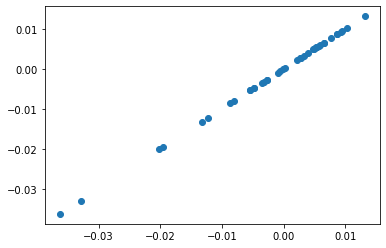

In [56]:
e_pred = eva.cf_matrix.dot(eva.eci)
plt.scatter(e_pred,energies_ip)
print(max(e_pred-energies_ip))

In [59]:
form_comp = []
db_name = "aucu_temp.db"
db = connect(db_name)

i=0
count = 0
for row in db.select(converged=True):
    
    ##### get relevant cif file
    atoms_init = row.toatoms()
    
    
    if form_energies[i] < 0.02 and len(atoms_init.numbers) < 64:
        form_comp.append(form_energies[i])
    
    i+=1


In [62]:
form_comp.append(new_energy)

In [63]:
db_name = "aucu_metals_Final_Submission.db"
db = connect(db_name)
energies_model = []
energies_dft = []
comps = []
num = 0
for row in db.select(converged=True):
    atoms = row.toatoms()
    
    energies_dft.append(form_comp[num])
    comp = 0
    for i in atoms.numbers:
        if i == 29:
            comp = comp+1
    comps.append(comp/len(atoms.numbers))

    energy_curr = get_ce_energy(settings,atoms,eci)/len(atoms.numbers)
    energies_model.append(energy_curr)
    num=num+1

In [64]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#003f5c
#58508d
#bc5090
#ff6361
#ffa600
N = 5
newcolors = []
newcolors.append((0,63,92))
newcolors.append((88,80,141)) 
newcolors.append((188,80,144)) 
newcolors.append((255,99,97)) 
newcolors.append((255,166,0)) 

newcolors_norm = []
for i in newcolors:
    curr = np.asarray(i)
    print(curr)
    curr = curr/255.0
    curr = tuple(curr)
    newcolors_norm.append(curr)

cmap_name = 'my_list'
newcmp = LinearSegmentedColormap.from_list(cmap_name,newcolors_norm)

[ 0 63 92]
[ 88  80 141]
[188  80 144]
[255  99  97]
[255 166   0]


In [78]:
print(min(energies_model))
print(max(energies_model))

print(min(energies_dft))
print(max(energies_dft))

-0.03622646304660704
0.013141020878826749
-0.04321954001488848
0.019783690280445132


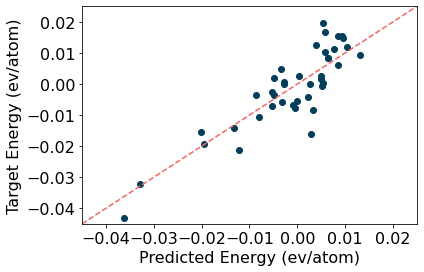

In [80]:
plt.scatter(energies_model,energies_dft,color=newcmp(0.0))


import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font',family='Arial')
hfont = {'fontname':'Arial'}
plt.xlabel('Predicted Energy (ev/atom)',fontsize=16,fontname = "Arial")
plt.ylabel('Target Energy (ev/atom)',fontsize=16,fontname = "Arial")
plt.xticks(fontsize = 16,fontname = "Arial") 
plt.yticks(fontsize = 16,fontname = "Arial") 
plt.xlim(-0.045,0.025)
plt.ylim(-0.045,0.025)
x = np.linspace(-0.045,0.025,200)
plt.plot(x,x,color=newcmp(0.75),linestyle = '--')
#plt.xticks([-4.4,-4.2,-4.0,-3.8])
#plt.yticks([-4.4,-4.2,-4.0,-3.8])
plt.savefig('CuAu_CE_fit_Final_Submission.pdf',bbox_inches='tight')
plt.show()

In [103]:
np.sqrt(np.mean(np.abs(np.asarray(energies_dft)-np.asarray(energies_model))**2))

0.0063297988666877

In [81]:
print(eci)

{'c0': 0.006100279787831659, 'c1_0': -0.0031900811734577247, 'c2_d0000_0_00': 0.017232296461428938, 'c2_d0001_0_00': -0.016839573363374966, 'c2_d0002_0_00': -0.005192441582986464, 'c2_d0003_0_00': -0.00042240992321274096, 'c3_d0000_0_000': -0.00770642159861723, 'c3_d0001_0_000': 0.008232628244981447, 'c4_d0000_0_0000': -0.0003380467088204115, 'c4_d0001_0_0000': -0.015681090820390833, 'c4_d0002_0_0000': 0.015097011177476766}


In [82]:
double = [1,2,3,4]
double_vals = [0.017232296461428938,-0.016839573363374966,-0.005192441582,-0.00042240992321274096]
triple = [5,6]
triple_vals = [ -0.00770642159861723,0.008232628244981447]
quad = [7,8,9]
quad_vals = [-0.0003380467088204115,-0.015681090820390833,0.015097011177476766]

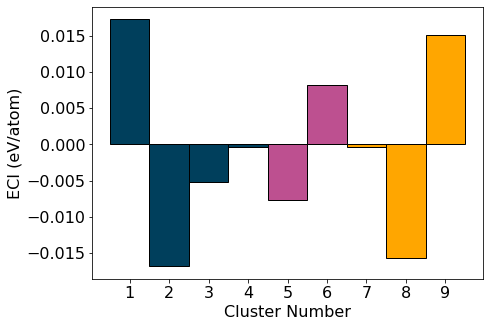

In [104]:
import matplotlib as mpl
mpl.rc('font',family='Arial')
hfont = {'fontname':'Arial'}
plt.rcParams["figure.figsize"] = (7,5)
plt.ylabel('ECI (eV/atom)',fontsize=16,fontname = "Arial")
plt.yticks(fontsize = 16,fontname = "Arial")
plt.xticks(fontsize = 16,fontname = "Arial") 
plt.xlabel('Cluster Number',fontsize=16,fontname = "Arial")
plt.xticks([1,2,3,4,5,6,7,8,9])
col = newcmp(0.0)
plt.bar(double,double_vals,width=1.0,color = col,edgecolor='black')
col = newcmp(0.5) 
plt.bar(triple,triple_vals,width=1.0,color = col,edgecolor='black')
col = newcmp(1.0)
plt.bar(quad,quad_vals,width=1.0,color = col,edgecolor='black')
plt.savefig('ECI_final_submission.pdf',bbox_inches='tight')
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#003f5c
#58508d
#bc5090
#ff6361
#ffa600
N = 5
newcolors = []
newcolors.append((0,63,92))
newcolors.append((88,80,141)) 
newcolors.append((188,80,144)) 
newcolors.append((255,99,97)) 
newcolors.append((255,166,0)) 

newcolors_norm = []
for i in newcolors:
    curr = np.asarray(i)
    print(curr)
    curr = curr/255.0
    curr = tuple(curr)
    newcolors_norm.append(curr)

cmap_name = 'my_list'
newcmp = LinearSegmentedColormap.from_list(cmap_name,newcolors_norm)

In [88]:
print(hull)

{0.0: 0.0, 0.25: -0.034167194236895584, 0.5: -0.03618248807455891, 0.75: -0.018754351039661065, 1.0: 1.474514954580286e-16}


In [84]:
import copy
concs_s = copy.deepcopy(concs)
concs_s.sort()
hull = other_energies
convex_hull = []
for i in range(len(concs)):
    curr = concs_s[i]
    if 0.0 <= curr and curr <= 0.25:
        temp = hull[0.0] + (curr/0.25)*(hull[0.25]-hull[0.0])
        
    elif 0.25 < curr and curr <= 0.50:
        temp = hull[0.25] + ((curr-0.25)/0.25)*(hull[0.50]-hull[0.25])
    elif 0.50 < curr and curr <= 0.75:
        temp = hull[0.50] + ((curr-0.50)/0.25)*(hull[0.75]-hull[0.50])
    else:
        temp = hull[0.75] + ((curr-0.75)/0.25)*(hull[1.0]-hull[0.75])
    convex_hull.append(copy.deepcopy(temp))

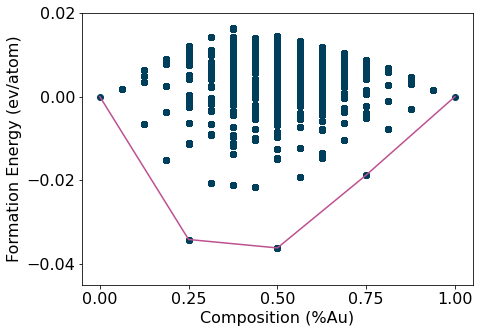

In [101]:
import matplotlib as mpl
mpl.rc('font',family='Arial')
hfont = {'fontname':'Arial'}
plt.rcParams["figure.figsize"] = (7,5)
col = plt.cm.hsv(0.6666666)  
plt.scatter(concs,energies,color=newcmp(0.0))

plt.plot(concs_s,convex_hull,color=newcmp(0.5))
plt.xlabel('Composition (%Au)',fontsize=16,fontname = "Arial")
plt.xticks([0.0,0.25,0.5,0.75,1.0])
plt.ylabel('Formation Energy (ev/atom)',fontsize=16,fontname = "Arial")
plt.yticks([-0.04,-0.02,0.0,0.02])
plt.xlim(-0.05,1.05)
plt.ylim(-0.045,0.02)
plt.xticks(fontsize = 16,fontname = "Arial") 
plt.yticks(fontsize = 16,fontname = "Arial") 
plt.savefig('C_Hull_final_submission.png',bbox_inches='tight',transparent=True, dpi=300)